# PLANT DISEASE DETECTION

## Using the Convolutional Neural NetWorks 

# Motivation

- As farmers and agriculture field are the important part of our life , farmers are the root level building blocks in the economy of any country . They work really heard for a whole season to grow a specific crop for survival of his family

- Sometimes these crops on which he dedicated his whole 3-6 months to nurture these crops got disease as result of which they can't sell their crops on the price he was expecting

- And He thinks if he knew these the plant disease before hand , he can use spefic pesticides and fertilizers to get over these disease

- What if we can use deep learning techniques to help famers to know about specific disease , so that they can be ready before harvestifying their crops

- Well we have implemented Resnet50 to detect the disease , but If we want model to be deploy inside a mobile app then mobilenet architecture will be suitable.

# Dataset
1. We have 38 classes of plant disease images which contains 70295 images in training set and 17572 in valid set

2. Each class contains average of 1700-1800 number of images to work upon

3. Each image is of size= (256,256,3)

In [1]:
# !pip install tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
import os
data_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/"
train_dir = data_dir + "train"
valid_dir = data_dir + "valid"
test_dir = "/kaggle/input/new-plant-diseases-dataset/test/test"
diseases = os.listdir(train_dir)

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
# test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

valid_data = image_dataset_from_directory(valid_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [4]:
train_data,valid_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [5]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

### Preview some images

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os 
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

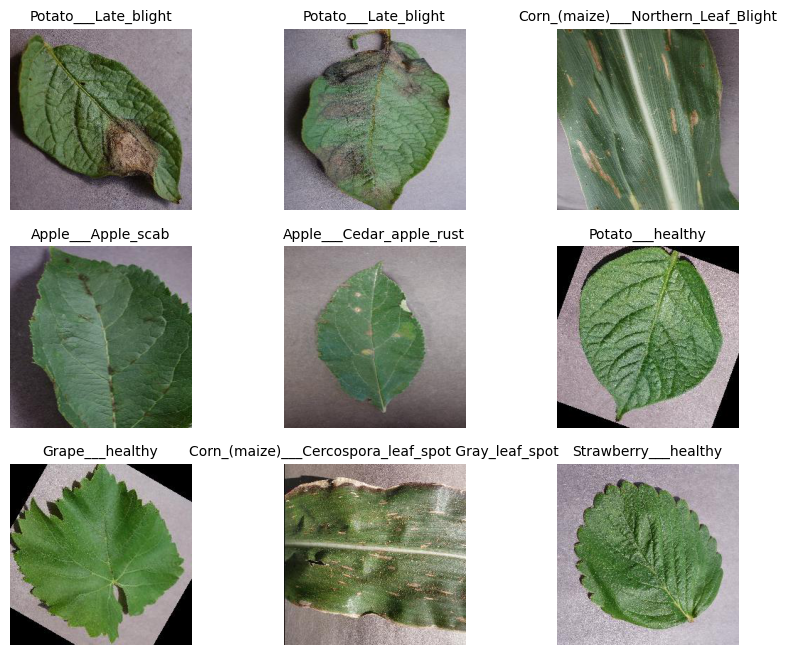

In [7]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

### IMPORTING NECESSARY LIBRARIES FOR TRAINING OF MODEL

In [8]:
# import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

## RESNET50 IMPLEMENTATION USING KERAS API

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

#### Model Building

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

# base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
# base_model = tf.keras.applications.resnet.ResNet152(include_top=False,)
base_model = tf.keras.applications.resnet.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')


94765736/94765736 [==============================] - 1s 0us/step


In [24]:
feature_model.save("RESNET50_PLANT_DISEASE.h5")

In [11]:
# base_model.trainable = True

# for layer in base_model.layers[:-20]:
#   layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [12]:
# base_model.summary()
feature_model.summary()

Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 GlobalAveragePooling2D_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 38)                2470      
                                               

In [13]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [14]:
#Training
feature_model.fit(train_data,validation_data=valid_data,epochs=20,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 1.3116 - accuracy: 0.6569
Epoch 1: val_accuracy improved from -inf to 0.85073, saving model to /content
200/200 [==============================] - 125s 561ms/step - loss: 1.3116 - accuracy: 0.6569 - val_loss: 0.4998 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.8784
Epoch 2: val_accuracy improved from 0.85073 to 0.89187, saving model to /content
200/200 [==============================] - 104s 521ms/step - loss: 0.3978 - accuracy: 0.8784 - val_loss: 0.3440 - val_accuracy: 0.8919 - lr: 0.0010
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.9114
Epoch 3: val_accuracy improved from 0.89187 to 0.91640, saving model to /content
200/200 [==============================] - 106s 531ms/step - loss: 0.2886 - accuracy: 0.9114 - val_loss: 0.2638 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 4/20
200/200 [========

In [15]:
feature_model.save("RESNET50_PLANT_DISEASE.h5")

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

Text(0.5, 1.0, 'loss')

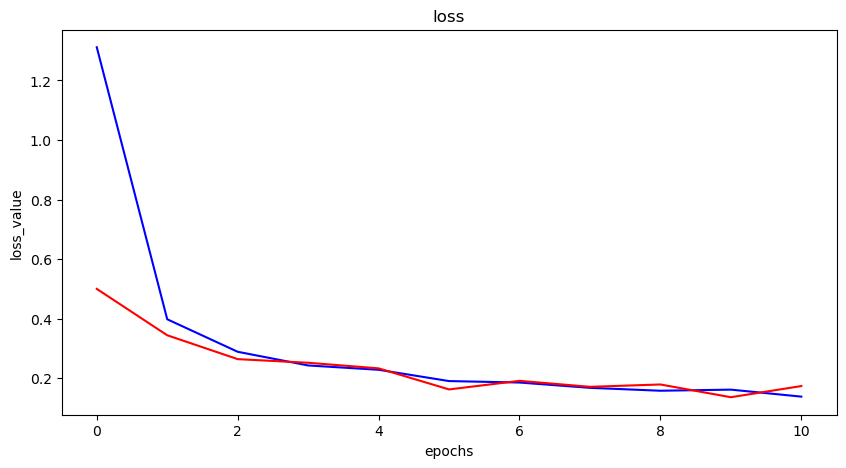

In [17]:
plt.figure(figsize=(10,5))
plt.plot(feature_model.history.history['loss'],color='b',label='Training loss')
plt.plot(feature_model.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")

Text(0.5, 1.0, 'accuracy graph')

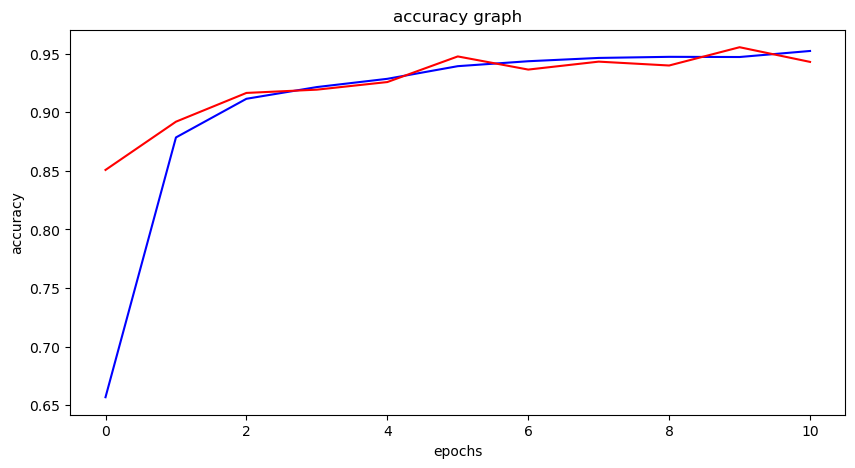

In [18]:
plt.figure(figsize=(10,5))
plt.plot(feature_model.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(feature_model.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")

In [33]:
# feature_model.evaluate(test_dir)
feature_model.evaluate(valid_data)

550/550 [==============================] - 58s 105ms/step - loss: 0.1734 - accuracy: 0.9429


[0.17339792847633362, 0.9428636431694031]

In [22]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

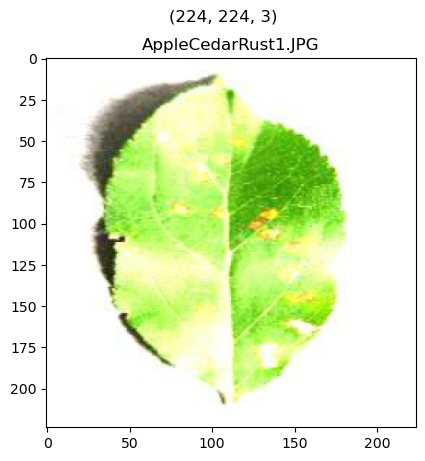

In [27]:
image = load_prep('/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [28]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 0s 33ms/step


array([[1.8238421e-05, 5.3537804e-07, 5.3270584e-01, 1.1457399e-04,
        4.6655694e-01, 1.1030074e-05, 1.3818199e-05, 5.3953224e-09,
        1.2946304e-09, 1.4341737e-09, 5.5621786e-07, 4.4755464e-07,
        5.2937665e-08, 1.8855292e-07, 1.2865227e-04, 2.2846912e-07,
        3.6266172e-09, 3.4145664e-06, 6.0597550e-08, 2.1728061e-04,
        1.3051128e-07, 1.7021174e-08, 4.4117434e-05, 2.9902269e-05,
        1.7564333e-06, 1.3305341e-09, 1.7462067e-10, 7.7199829e-06,
        3.8638859e-10, 1.8853170e-07, 4.5865426e-07, 1.8196326e-07,
        1.7193623e-06, 5.0298337e-07, 1.3960172e-04, 7.8304424e-08,
        3.2911822e-07, 1.4924778e-06]], dtype=float32)

In [29]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [35]:
class_names = valid_data.class_names

def random_image_predict(model,test_dir=valid_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  
  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 32ms/step


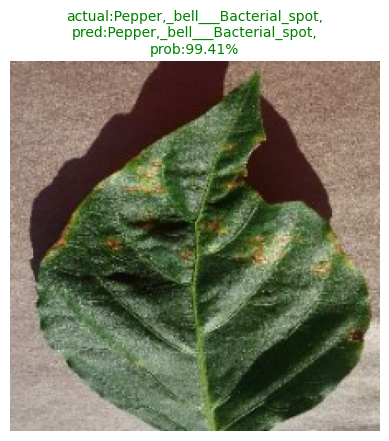

In [36]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 28ms/step


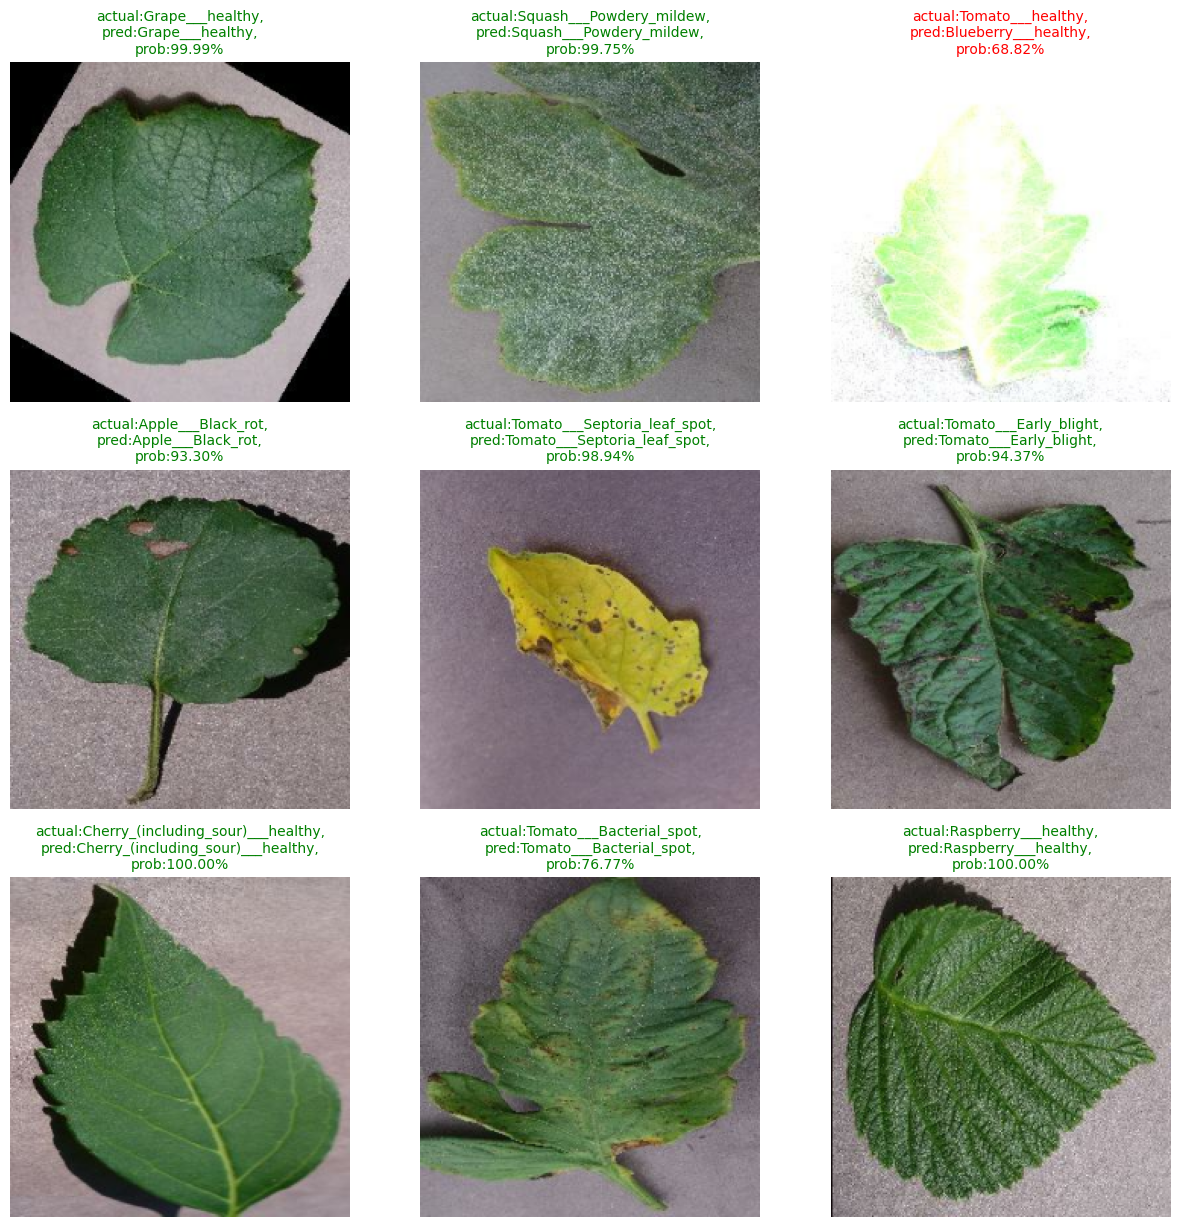

In [38]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,valid_dir)

1/1 [==============================] - 0s 29ms/step


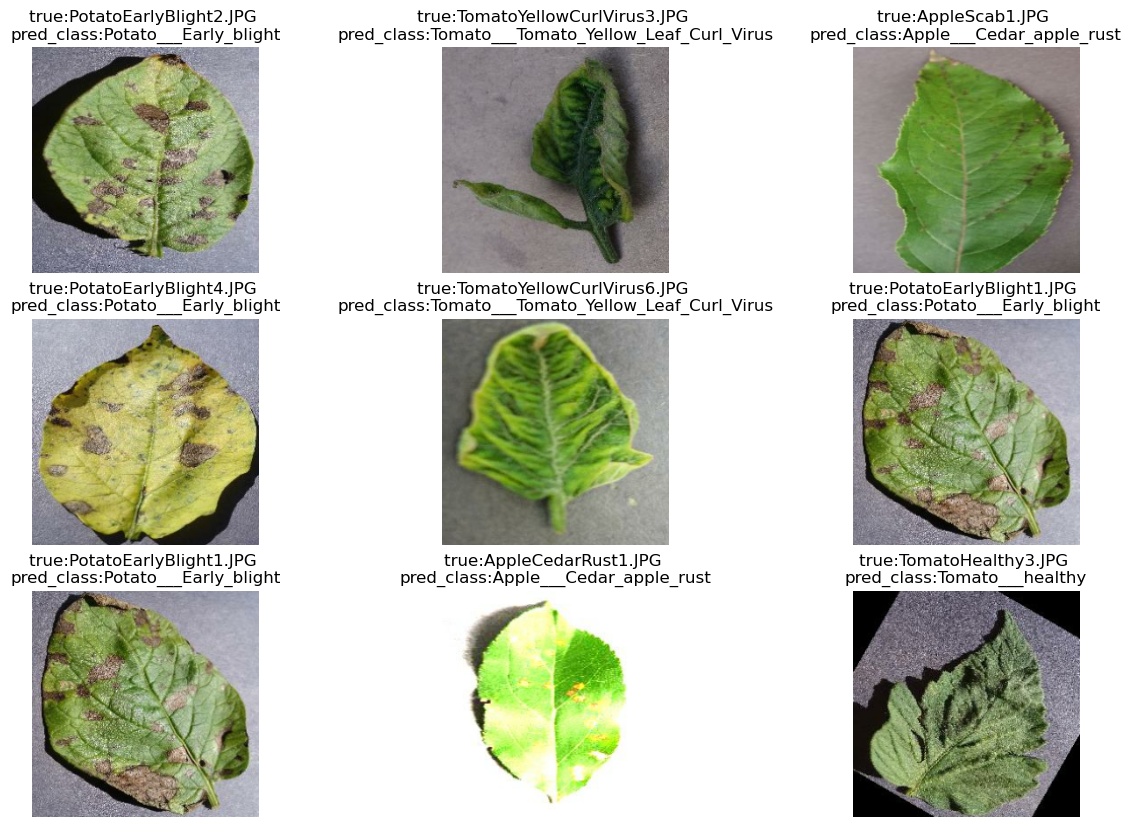

In [39]:
data_dir='/kaggle/input/new-plant-diseases-dataset/test/test/'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)

#### Training using RESNET152 and EFFICIENTNET

In [40]:
# import datetime

# def create_tensorboard_callback(dir_name, experiment_name):
#   log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(
#       log_dir=log_dir
#   )
#   print(f"Saving TensorBoard log files to: {log_dir}")
#   return tensorboard_callback

In [41]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
#                                                   patience=3)

# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
#                                                  factor=0.2, 
#                                                  patience=2,
#                                                  verbose=1, 
#                                                  min_lr=1e-7)

# checkpoint_path = "fine_tune_checkpoints/"
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                       save_weights_only=True,
#                                                       save_best_only=True,
#                                                       monitor="val_loss")


In [42]:
# initial_epochs = 15

# history1 = feature_model.fit(train_data,epochs=initial_epochs,
#                   steps_per_epoch=len(train_data),
#                   validation_data=test_data,
#                   validation_steps=len(test_data),
#                   callbacks=[early_stopping,
#                              model_checkpoint,
#                              reduce_lr,
#                              create_tensorboard_callback('plant_disease_model',
#                                                          'EfficientNetB010')])

In [43]:
# feature_model.load_weights(checkpoint_path)

In [44]:
# import matplotlib.pyplot as plt

# def plot_history(history):

#   loss = history.history['loss']
#   val_loss = history.history['val_loss']

#   epochs = history1.epoch

#   acc = history.history['accuracy']
#   val_acc =history.history['val_accuracy']

#   plt.figure(figsize=(8,10))
#   plt.subplot(2,1,1)
#   plt.plot(epochs,loss)
#   plt.plot(epochs,val_loss)
#   plt.title('Training_loss vs Validation_loss')

#   plt.subplot(2,1,2)
#   plt.plot(epochs,acc)
#   plt.plot(epochs,val_acc)
#   plt.title('Training_accuracy vs Validation_accuracy')

In [45]:
# plot_history(history1)